**MODELO PARA GERAR SCORE DE CRÉDITO PARA NOVOS CLIENTES**

Quando um banco recebe um pedido de empréstimo, com base no perfil do solicitante, o banco precisa tomar uma decisão sobre se deve ou não prosseguir com a aprovação do empréstimo. Dois tipos de riscos estão associados à decisão do banqueiro.

* Se o candidato tem um bom risco de crédito, ou seja, é provável que pague o empréstimo e não aprovar o empréstimo para a pessoa resulta em perda de negócios para o banco,

* Se o requerente tem um risco de crédito ruim, ou seja, não é provável que pague o empréstimo, e em seguida, aprovar o empréstimo para a pessoa resulta em uma perda financeira para o banco.

### Dados

Os Dados de Crédito Alemães contêm dados sobre 20 variáveis e a classificação se um candidato é considerado um risco de crédito Bom ou Mau para 1000 candidatos a empréstimo.

Espera-se que um modelo preditivo desenvolvido com base nesses dados forneça orientação ao gerente do banco para tomar uma decisão sobre a aprovação de um empréstimo para um possível candidato com base em seus/seus perfis.

fonte: https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsgermancsv



Os preditores que podem potencialmente ter qualquer influência sobre a Credibilidade:

* Account Balance - Saldo da Conta: Nenhuma conta (1), Sem saldo (2), Algum Saldo (3)

* Payment Status - Status do Pagamento: Alguns Problemas (1), Pagos (2), Sem Problemas (neste banco) (3)

* Savings - Poupança/Valor de Estoque: Nenhum, Abaixo de 100 DM, [100, 1000] DM, Acima de 1000 DM

* Employment Lenght - Duração do Emprego: Abaixo de 1 ano (incluindo desempregados), [1, 4), [4, 7), Acima de 7

* Sexo/Estado Marital: Masculino Divorciado/Single, Masculino Casado/Viúvo, Feminino

* No one credits at this bank - sem créditos neste banco: 1, Mais de 1

* Guarantor - Garantias: Nenhum, Sim

* Concurrent credtis - Créditos Simultâneos: Outros Bancos ou Lojas de Departamentos, Nenhum

* Purporse - Propósito do Crédito: Carro novo, Carro usado, Relacionado com a casa, Outro

*A variável ForeignWorker pode ser retirada do estudo.*

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
dados = pd.read_csv('german.csv', sep=';')
dados.head(5)

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### ANALISE EXPLORATÓRIA

In [ ]:
#!pip install sweetviz
import sweetviz as sv # Breve análise de dados automática
eda= sv.analyze(dados, target_feat='Creditability')
eda.show_html() #show_notebook para abrir direto aqui

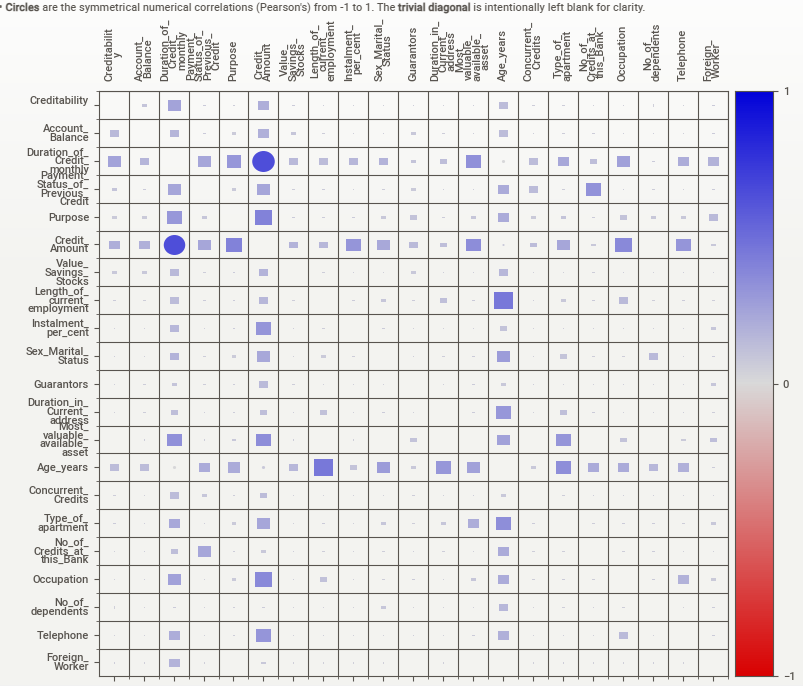

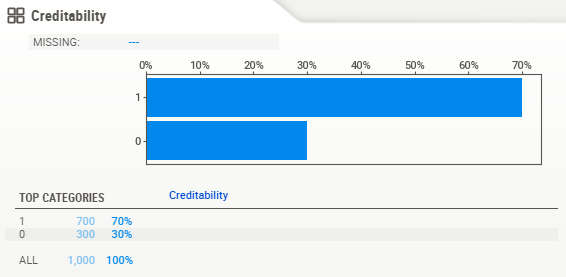

A base de dados contém apenas 1000 observações, e baseado nelas a análise será realizada. Dos 1000 clientes do banco, 30% estão inapropriados para novos valores, devidos a diversos fatores, dos quais poderão ser explicados.

**Informações sobre a conta corrente:**

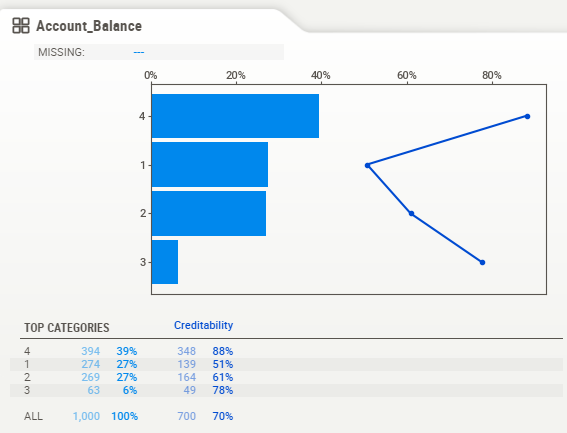

O item 1 (sem conta) apresenta os maiores propensos a não quitarem as dividas, seguido do item 2 (conta aberta, sem saldo).

**Carência:**

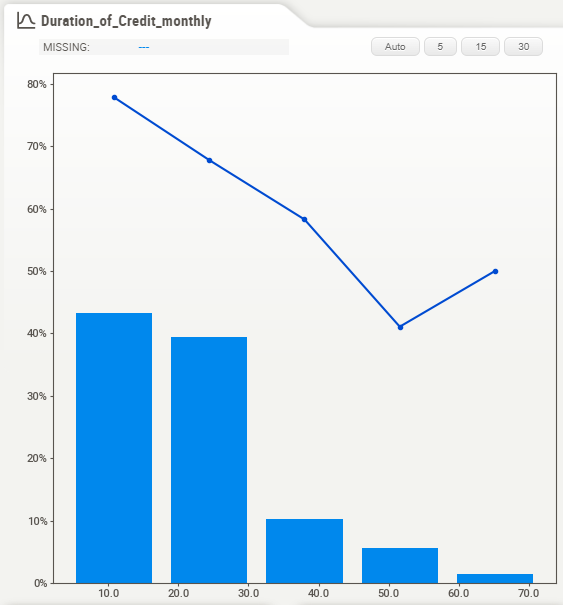

Empréstimos com duração maior do que 24 meses tendem a maior chance de calote.

**Status de pagamentos de empréstimos:**

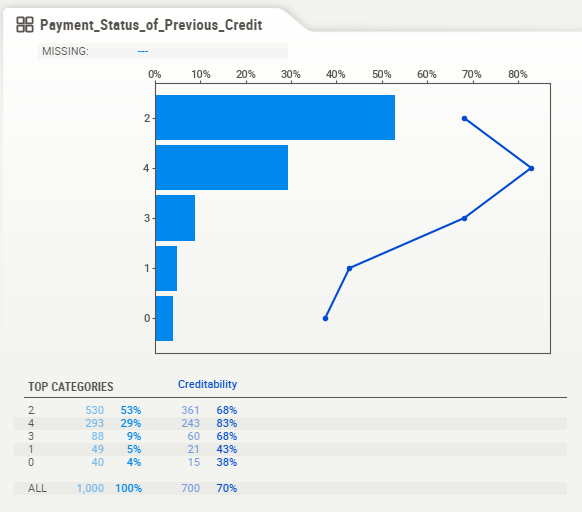

Clientes com atraso (0) e com alguns problemas com prazos (1) são os clientes mais problemáticos, enquanto que os que pagam em dia e os demais clientes com saldo não apresentam tendência à fraudes.

**Crédito disponível:**

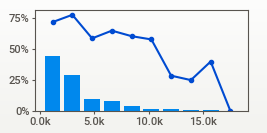

Clientes com menores créditos disponíveis são os que tem mais problemas com os financiamentos.

**Créditos simltâneos:**

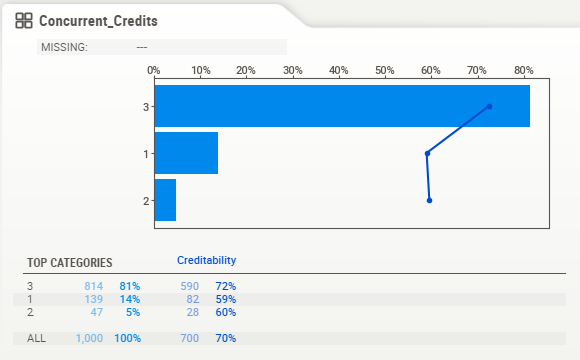

Clientes com crédito em outros bancos (1) e em lojas de departamento (2) destoam dos que não tem nenhum outro crédito na praça e estão com score baixo nesta instituição.

**Quantidade de valores solicitados:**

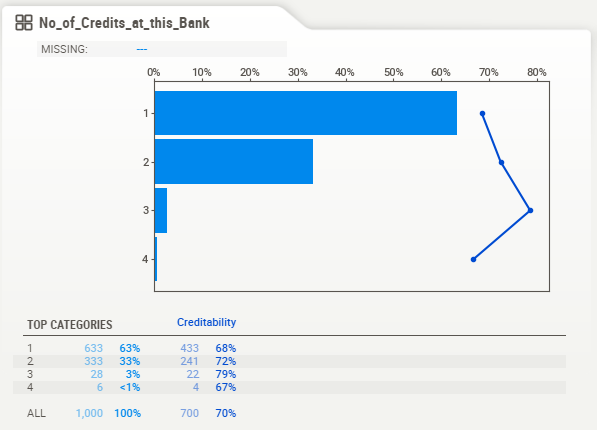


Quanto mais crédito os clientes pedem maior a probabilidade de terem problemas com os pagamentos no futuro.

---

Essas serão as variáveis mais importantes a serem levadas em conta nos algoritmos para as novas solicitações.

### PRÉ PROCESSAMENTO

In [4]:
# Descartando variaveis
dados.drop(['Guarantors', 'Purpose', 'Duration_in_Current_address','Concurrent_Credits', 'No_of_dependents', 'Telephone', 'Foreign_Worker'], inplace=True, axis=1)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Credit_Amount                      1000 non-null   int64
 5   Value_Savings_Stocks               1000 non-null   int64
 6   Length_of_current_employment       1000 non-null   int64
 7   Instalment_per_cent                1000 non-null   int64
 8   Sex_Marital_Status                 1000 non-null   int64
 9   Most_valuable_available_asset      1000 non-null   int64
 10  Age_years                          1000 non-null   int64
 11  Type_of_apartment                  1000 non-null   int64
 12  No_of_Credits_at_this

In [6]:
dados.describe()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Most_valuable_available_asset,Age_years,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,3271.24800,2.105000,3.384000,2.973000,2.68200,2.358000,35.54200,1.928000,1.407000,2.904000
std,0.458487,1.257638,12.058814,1.08312,2822.75176,1.580023,1.208306,1.118715,0.70808,1.050209,11.35267,0.530186,0.577654,0.653614
min,0.000000,1.000000,4.000000,0.00000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,19.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,27.00000,2.000000,1.000000,3.000000
50%,1.000000,2.000000,18.000000,2.00000,2319.50000,1.000000,3.000000,3.000000,3.00000,2.000000,33.00000,2.000000,1.000000,3.000000
75%,1.000000,4.000000,24.000000,4.00000,3972.25000,3.000000,5.000000,4.000000,3.00000,3.000000,42.00000,2.000000,2.000000,3.000000
max,1.000000,4.000000,72.000000,4.00000,18424.00000,5.000000,5.000000,4.000000,4.00000,4.000000,75.00000,3.000000,4.000000,4.000000


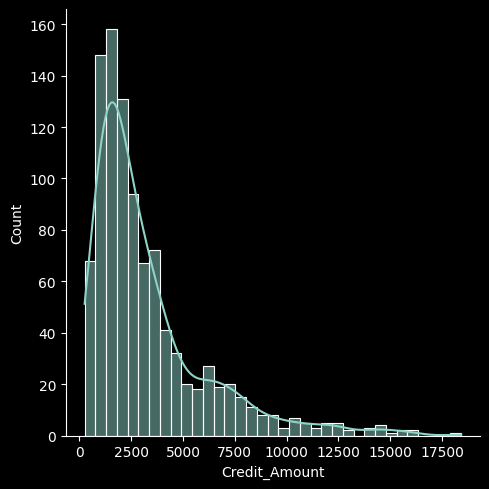

In [7]:
# visualizando com grafico com uma linha de suavização
import seaborn as sns
sns.displot(dados.Credit_Amount, kde=True);

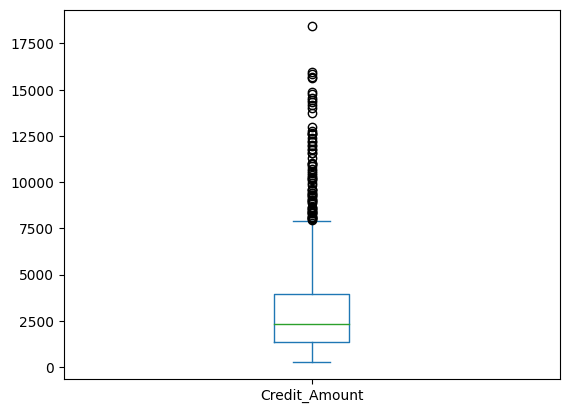

In [7]:
#Verificação de outliers
dados['Credit_Amount'].plot(kind='box');

In [8]:
# Remoção de 5 outliers
dados = dados[dados['Credit_Amount'] <= 15000]
dados.shape

(995, 14)

**UTILIZAR RANDOM FOREST OU GRADIENT BOOSTING POIS OS OUTLIERS CORRESPONDEM A APROX. 9% DOS DADOS.**

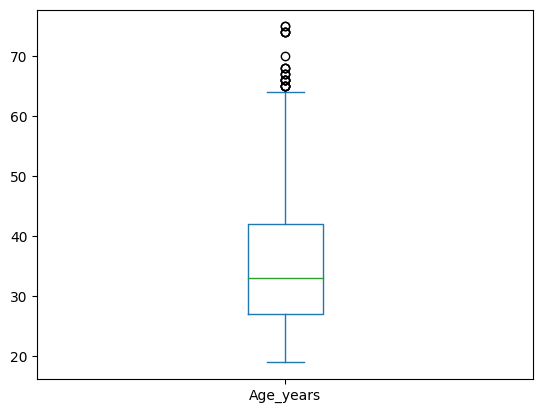

In [9]:
#dados['Credit_Amount'].plot(kind='hist', edgecolor = 'white');
dados['Age_years'].plot(kind='box');

In [9]:
# Excluindo alguns outliers
dados[dados['Age_years'] >= 65]['Age_years'].value_counts()

Age_years
65    5
66    5
74    4
68    3
67    3
75    2
70    1
Name: count, dtype: int64

In [10]:
dados = dados[dados['Age_years'] <= 65]
dados.shape

(977, 14)

In [11]:
dados.sample(5)

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Most_valuable_available_asset,Age_years,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation
664,1,1,8,4,713,1,5,4,3,1,47,2,2,2
305,1,4,24,2,1469,2,5,4,4,1,41,1,1,2
855,0,1,48,2,3931,1,4,4,3,4,46,3,1,3
945,0,2,15,1,6850,2,1,1,3,2,34,2,1,4
304,0,3,9,2,745,1,3,3,2,1,28,2,1,2


In [13]:
# dummificar
dados1 = dados
dados1 = pd.get_dummies(dados, columns=['Account_Balance',	'Payment_Status_of_Previous_Credit',	'Value_Savings_Stocks',	'Length_of_current_employment',
                                        'Instalment_per_cent',	'Sex_Marital_Status', 'Most_valuable_available_asset',	'Type_of_apartment',
                                        'No_of_Credits_at_this_Bank',	'Occupation'])

In [14]:
# Normalização Z (Padronização)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dados1[['Credit_Amount','Age_years','Duration_of_Credit_monthly']] = scaler.fit_transform(dados1[['Credit_Amount','Age_years','Duration_of_Credit_monthly']])

In [15]:
dados1.head()

,Creditability,Duration_of_Credit_monthly,Credit_Amount,Age_years,Account_Balance_1,Account_Balance_2,Account_Balance_3,Account_Balance_4,Payment_Status_of_Previous_Credit_0,Payment_Status_of_Previous_Credit_1,...,Type_of_apartment_2,Type_of_apartment_3,No_of_Credits_at_this_Bank_1,No_of_Credits_at_this_Bank_2,No_of_Credits_at_this_Bank_3,No_of_Credits_at_this_Bank_4,Occupation_1,Occupation_2,Occupation_3,Occupation_4
0,1,-0.243721,-0.809964,-1.333308,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,-0.998578,-0.150387,0.103746,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1,-0.746959,-0.888359,-1.141701,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,-0.746959,-0.405549,0.391157,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,-0.746959,-0.387081,0.295354,1,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


##### MACHINE LEARNING

RANDOM FOREST

In [16]:
# separação de variáveis preditoras e variával resposta
y = dados1['Creditability']
# Remova a coluna 'Creditability' do DataFrame original
X = dados1.drop('Creditability', axis=1)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

modelo = RandomForestClassifier(n_estimators = 100, # nº de arvores
                                # max_features = 'auto', # qtde de nós que a arvore observa em um nó
                                bootstrap = True, # Na literatura essa aleatoriedade extra tende a gerar melhores resultados
                                max_depth = 7, # profundidade
                                min_samples_split = 20) # numero minimo de amostra num nó permitido, menos que isso ela para de dividir.

medidas = cross_validate(modelo, X, y, cv = validacao, scoring = 'accuracy')
print('Média da acurácia: ', round(medidas['test_score'].mean(), 4))

Média da acurácia:  0.7462


GRADIENT BOOSTING

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
validacao = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3)

# Crie um modelo Gradient Boosting
gradient_boosting = GradientBoostingClassifier(max_depth=7, n_estimators=50, max_leaf_nodes=15, min_samples_split=40)

# Realize a validação cruzada
scores = cross_val_score(gradient_boosting, X, y, cv=validacao, scoring='accuracy')

# Imprima as pontuações de validação cruzada
#print("Pontuações de validação cruzada:", scores)
print("Média da acurácia:", scores.mean().round(4))

Média da acurácia: 0.7543


TUNAGEM DE HIPERPARAMETROS DO GRADIENTE BOOSTING

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Defina uma grade de hiperparâmetros para pesquisa
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5],
              'learning_rate': [0.1, 0.01, 0.001]}

# Crie um modelo Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

# Crie um objeto GridSearchCV
grid_search = GridSearchCV(gradient_boosting, param_grid, cv=validacao, scoring='accuracy')

# Realize a pesquisa de hiperparâmetros
grid_search.fit(X, y)

# Melhores hiperparâmetros encontrados
best_params = grid_search.best_params_
print(f'Melhores hiperparâmetros encontrados: {best_params}')

# Melhor desempenho
best_score = grid_search.best_score_
print(f'Melhor desempenho (acurácia): {best_score}')

Melhores hiperparâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Melhor desempenho (acurácia): 0.7509537835752859


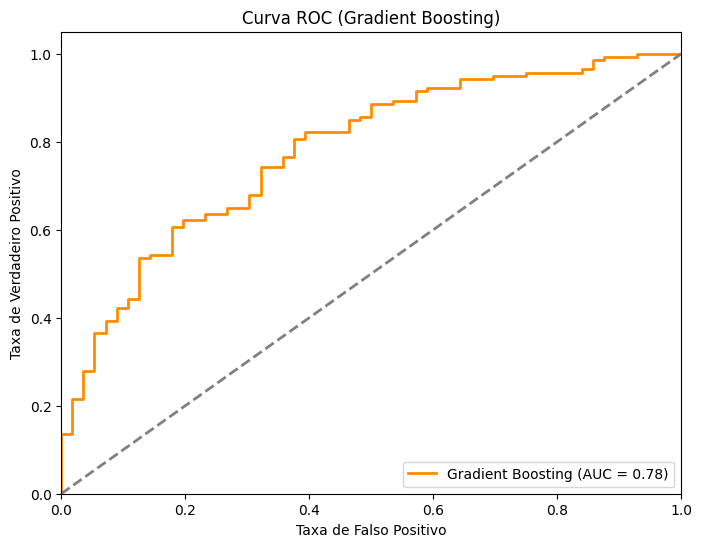

In [20]:
# Curva ROC para o Gradiente
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie um modelo Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

# Treine o modelo nos dados de treinamento
gradient_boosting.fit(X_train, y_train)

# Obtenha as probabilidades previstas para a classe positiva
y_prob_gb = gradient_boosting.predict_proba(X_test)[:, 1]

# Calcule a curva ROC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Plote a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC (Gradient Boosting)')
plt.legend(loc='lower right')
plt.show()

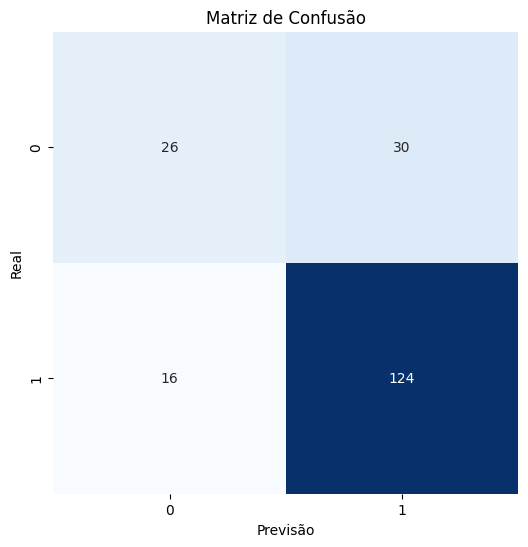

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Treine seu modelo Gradient Boosting
gradient_boosting.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = gradient_boosting.predict(X_test)

# Crie a matriz de confusão
confusion = confusion_matrix(y_test, y_pred)

# Plote a matriz de confusão
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

### MODELO PARA DEPLOY NO STREAMLIT

In [12]:
# Selecionando algumas variaveis para treino/testes
df = dados[['Creditability', 'Duration_of_Credit_monthly','Account_Balance','Length_of_current_employment','Sex_Marital_Status','Age_years', 'No_of_Credits_at_this_Bank']]

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import joblib

# Seus dados e variáveis
X = df[['Duration_of_Credit_monthly', 'Account_Balance', 'Length_of_current_employment', 'Sex_Marital_Status', 'Age_years', 'No_of_Credits_at_this_Bank']]
y = df['Creditability']

# Criando transformações
numeric_features = ['Duration_of_Credit_monthly', 'Age_years']
categorical_features = ['Account_Balance', 'Length_of_current_employment', 'Sex_Marital_Status', 'No_of_Credits_at_this_Bank']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                               ('cat', categorical_transformer, categorical_features)])
# Criando o modelo
modelo_boosting = GradientBoostingClassifier(max_depth=7, n_estimators=50, max_leaf_nodes=25, min_samples_split=30, learning_rate=0.1)

# Criando a pipeline completa
pipeline_boosting = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', modelo_boosting)])
# Treinando o modelo com todos os dados
pipeline_boosting.fit(X, y)
# Salvando o modelo em um arquivo pkl
joblib.dump(pipeline_boosting, 'modelo_boosting.pkl')

['modelo_boosting.pkl']

NOVOS DADOS

In [14]:
# Criando um novo DataFrame para novos dados
nvds = pd.DataFrame(columns=['Account_Balance','Duration_of_Credit_monthly', 'Length_of_current_employment', 'Sex_Marital_Status', 'Age_years', 'No_of_Credits_at_this_Bank'])
nvds.loc[0, 'Account_Balance'] = 2
nvds.loc[0, 'Duration_of_Credit_monthly'] = 24
nvds.loc[0, 'Length_of_current_employment'] = 1
nvds.loc[0, 'Sex_Marital_Status'] = 1
nvds.loc[0, 'Age_years'] = 32
nvds.loc[0, 'No_of_Credits_at_this_Bank'] = 1
#nvds.astype(float)

In [15]:
previsao_novos_dados = pipeline_boosting.predict(nvds)
#print(f'Previsão para novos dados: {previsao_novos_dados[0]}')

if previsao_novos_dados == 0:
  print('Não aprovar novo crédito')
else:
  print('Aprovar')

Não aprovar novo crédito
